C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


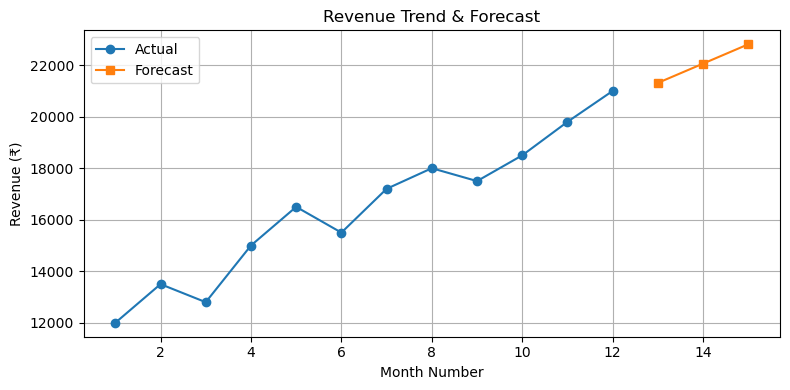

Model Fit — MAE: 549.88 | R²: 0.94


In [1]:
# Day 8 — Predictive Indicators: Seeing What’s Next
# Author: Shailesh Pawar (Kalkiklyg)

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error

# 1️⃣ Simulated monthly revenue data
data = {
    "Month": ["Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Oct","Nov","Dec"],
    "Revenue": [12000,13500,12800,15000,16500,15500,17200,18000,17500,18500,19800,21000]
}
df = pd.DataFrame(data)
df["Month_No"] = np.arange(1, len(df)+1)

# 2️⃣ Calculate growth %
df["Growth_%"] = df["Revenue"].pct_change().round(3) * 100

# 3️⃣ Build simple linear regression model
X = df[["Month_No"]]
y = df["Revenue"]
model = LinearRegression()
model.fit(X, y)

# Forecast next 3 months
future_months = np.arange(13,16).reshape(-1,1)
future_pred = model.predict(future_months)

forecast_df = pd.DataFrame({
    "Month_No": [13,14,15],
    "Month": ["Jan_2026","Feb_2026","Mar_2026"],
    "Predicted_Revenue": future_pred.round(0)
})

# 4️⃣ Merge and visualize
combined = pd.concat([
    df[["Month_No","Month","Revenue"]].rename(columns={"Revenue":"Value"}).assign(Type="Actual"),
    forecast_df[["Month_No","Month","Predicted_Revenue"]].rename(columns={"Predicted_Revenue":"Value"}).assign(Type="Forecast")
])

plt.figure(figsize=(8,4))
for label, marker in [("Actual","o"),("Forecast","s")]:
    subset = combined[combined["Type"]==label]
    plt.plot(subset["Month_No"], subset["Value"], marker=marker, label=label)

plt.title("Revenue Trend & Forecast")
plt.xlabel("Month Number")
plt.ylabel("Revenue (₹)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# 5️⃣ Model accuracy
preds = model.predict(X)
mae = mean_absolute_error(y, preds)
r2 = r2_score(y, preds)
print(f"Model Fit — MAE: {mae:.2f} | R²: {r2:.2f}")